# 군집화(Clustering) - K-Means 알고리즘

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Iris 데이터 군집화

In [16]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data)
pca = PCA(2)
iris_pca = pca.fit_transform(iris_std)
df = pd.DataFrame(iris_std, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0


- K-means 모델 생성/학습

In [7]:
from sklearn.cluster import KMeans
KMeans().get_params()

{'algorithm': 'auto',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 8,
 'n_init': 10,
 'random_state': None,
 'tol': 0.0001,
 'verbose': 0}

In [9]:
kmeans = KMeans(n_clusters=3, random_state=2022)
kmeans.fit(iris_std)             # 비지도학습이므로 y값을 주지 않음


KMeans(n_clusters=3, random_state=2022)

In [10]:
# 학습결과
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [12]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2], dtype=int32), array([53, 50, 47]))

In [17]:
df = pd.DataFrame({
    'PC1':iris_pca[:, 0], 'PC2':iris_pca[:, 1],
    'target':iris.target, 'cluster': kmeans.labels_

})
df.head()

,PC1,PC2,target,cluster
0,-2.264703,0.480027,0,1
1,-2.080961,-0.674134,0,1
2,-2.364229,-0.341908,0,1
3,-2.299384,-0.597395,0,1
4,-2.389842,0.646835,0,1


In [20]:
# 데이터 분포
df.groupby(['target', 'cluster'])[['PC1']].count()

PC1
target cluster     
0      1         50
1      0         39
       2         11
2      0         14
       2         36

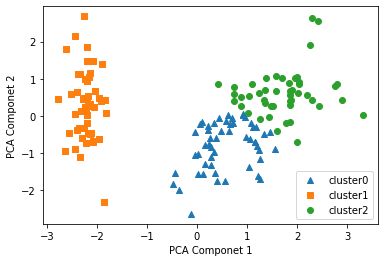

In [21]:
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_data = df[df.cluster == i]['PC1']
    y_data = df[df.cluster == i]['PC2']
    plt.scatter(x_data, y_data, marker=marker, label='cluster' + str(i))
plt.legend()
plt.xlabel('PCA Componet 1'), plt.ylabel('PCA Componet 2')
plt.show()

 - 원본데이터와 군집화된 데이터 비교

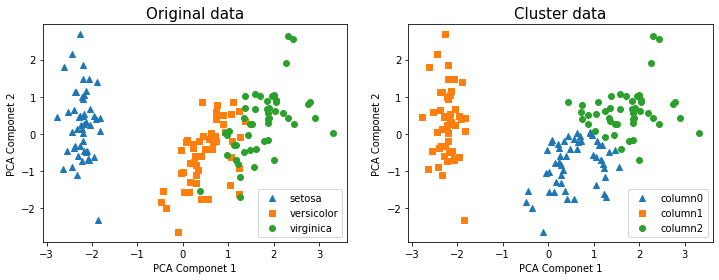

In [27]:
plt.figure(figsize=(12,4))
for k, column in enumerate(['target', 'cluster']):
    plt.subplot(1, 2, k+1)
    for i, marker in enumerate(markers):
        x_data = df[df[column] == i]['PC1']
        y_data = df[df[column] == i]['PC2']
        if k == 0:
            plt.title('Original data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label=iris.target_names[i])
        else:
            plt.title('Cluster data', fontsize=15)
            plt.scatter(x_data, y_data, marker=marker, label='column' + str(i))
    plt.legend()
    plt.xlabel('PCA Componet 1'), plt.ylabel('PCA Componet 2')
plt.show()